In [25]:
#importer les llibrairies necessaires
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [24]:
image_path = "C:/Users/neire/Downloads/cat.jpg"
image = cv2.imread(image_path)

In [8]:

# Paramètres du bruit
mean = 0  # Moyenne du bruit
sigma = 25  # Écart-type du bruit

# Générer un bruit gaussien
noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)

# Ajouter le bruit à l'image (avec saturation pour éviter les débordements)
noisy_image = cv2.add(image, noise)

# Afficher l'image originale et bruitée
cv2.imshow("Original", image)
cv2.imshow("Noisy Image", noisy_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
#apply Frequency Domain Filters
domainFilter = cv2.edgePreservingFilter(image, flags=1, sigma_s=60, sigma_r=0.6)
cv2.imshow('Domain Filter',domainFilter)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
#apply Frequency Domain Filters
domainFilter = cv2.edgePreservingFilter(noisy_image, flags=1, sigma_s=60, sigma_r=0.6)
cv2.imshow('Domain Filter',domainFilter)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
#apply Gaussian Blur 
gaussBlur = cv2.GaussianBlur(image,(5,5),cv2.BORDER_DEFAULT)
cv2.imshow("Gaussian Smoothing",gaussBlur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#apply Gaussian Blur 
gaussBlur = cv2.GaussianBlur(image,(5,5),cv2.BORDER_DEFAULT)
cv2.imshow("Gaussian Smoothing",noisy_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
prob=0.02
noisy_img = np.copy(image)  # Copy the original image
total_pixels = image.size  # Total number of pixels
# Number of salt & pepper pixels
num_salt = int(prob * total_pixels / 2)
num_pepper = int(prob * total_pixels / 2)
    
# Add Salt (white pixels)
coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape[:2]]
noisy_img[coords[0], coords[1]] = 255  # White pixels
    
# Add Pepper (black pixels)
coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape[:2]]
noisy_img[coords[0], coords[1]] = 0  # Black pixels

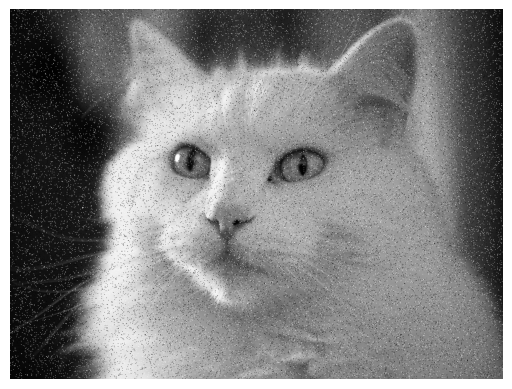

In [14]:
# Display the image using Matplotlib
plt.imshow(noisy_img, cmap="gray") 
plt.axis("off")
plt.show()

In [15]:
# Apply Median Filter (kernel size must be odd)
filtered_image = cv2.medianBlur(noisy_img, 5)

# Show results
cv2.imshow("Noisy Image", noisy_img)
cv2.imshow("Filtered Image", filtered_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

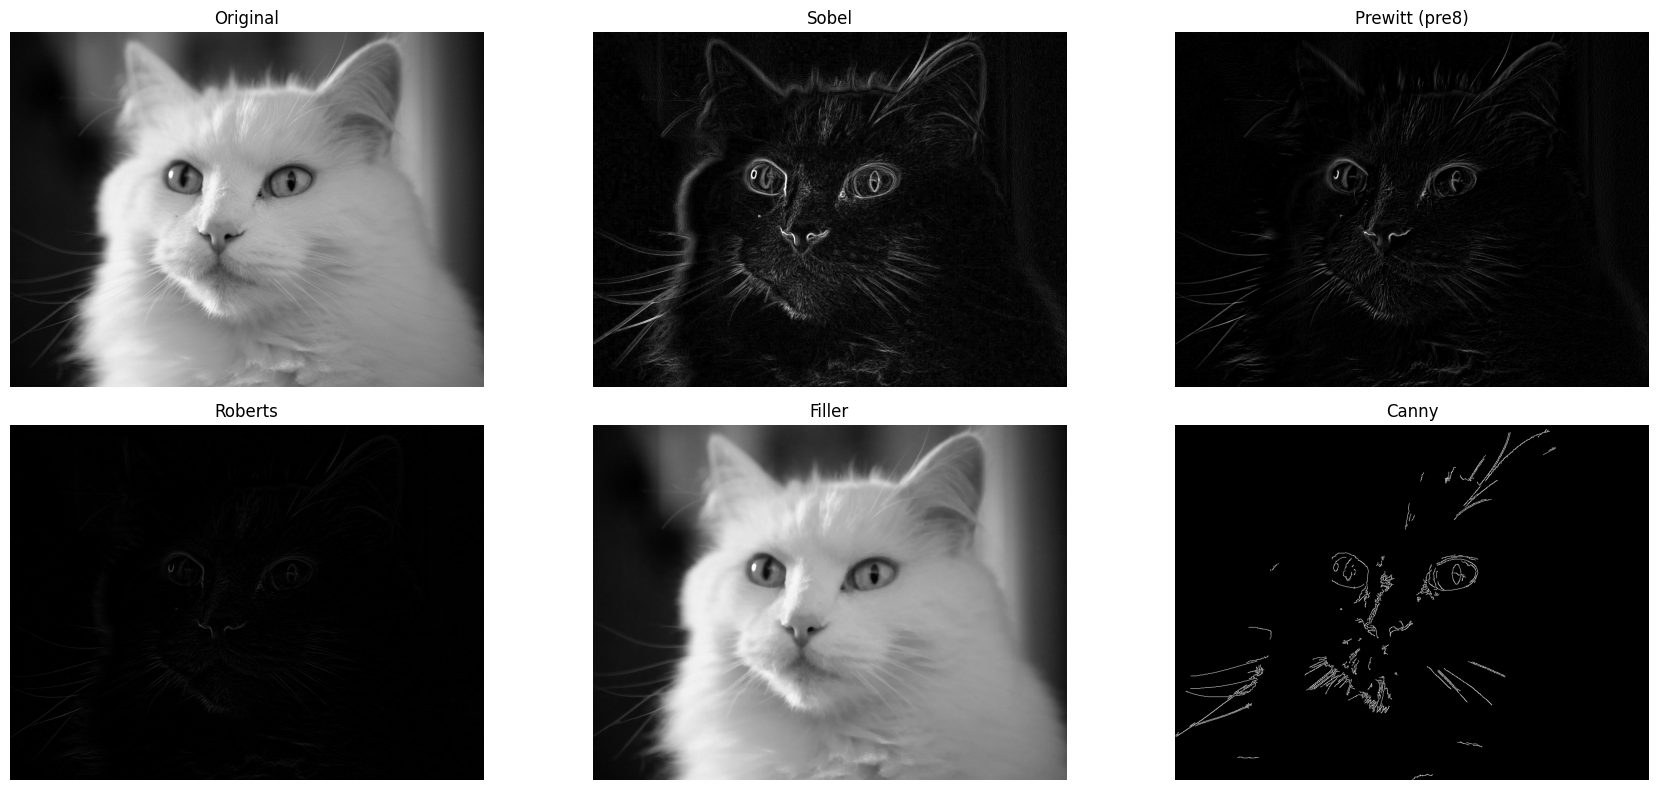

In [22]:

# ---------- SOBEL ----------
sobel_ksize = 3  # 3 or 5 usually best
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=sobel_ksize)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=sobel_ksize)
sobel = cv2.magnitude(sobelx, sobely)
sobel = cv2.convertScaleAbs(sobel)

# ---------- PREWITT ----------
# Prewitt doesn't have ksize option, so manually tune kernels
prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewittx = cv2.filter2D(image, -1, prewitt_kernel_x)
prewitty = cv2.filter2D(image, -1, prewitt_kernel_y)
prewitt = cv2.magnitude(prewittx.astype(np.float32), prewitty.astype(np.float32))
prewitt = cv2.convertScaleAbs(prewitt)

# ---------- ROBERTS ----------
roberts_kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
roberts_kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
robertsx = cv2.filter2D(image, -1, roberts_kernel_x)
robertsy = cv2.filter2D(image, -1, roberts_kernel_y)
roberts = cv2.magnitude(robertsx.astype(np.float32), robertsy.astype(np.float32))
roberts = cv2.convertScaleAbs(roberts)

# ---------- FILLER (MORPHOLOGY) ----------
# Closing helps remove small holes in foreground
morph_kernel = np.ones((5, 5), np.uint8)
filler = cv2.morphologyEx(image, cv2.MORPH_CLOSE, morph_kernel)

# ---------- CANNY ----------
# Auto-calculated thresholds for better performance
def auto_canny(img, sigma=0.33):
    med = np.median(img)
    lower = int(max(0, (1.0 - sigma) * med))
    upper = int(min(255, (1.0 + sigma) * med))
    return cv2.Canny(img, 50, 150)

canny = auto_canny(image)


# ---------- DISPLAY ----------
titles = ['Original', 'Sobel', 'Prewitt (pre8)', 'Roberts', 'Filler', 'Canny']
images = [image, sobel, prewitt, roberts, filler, canny]

plt.figure(figsize=(18, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

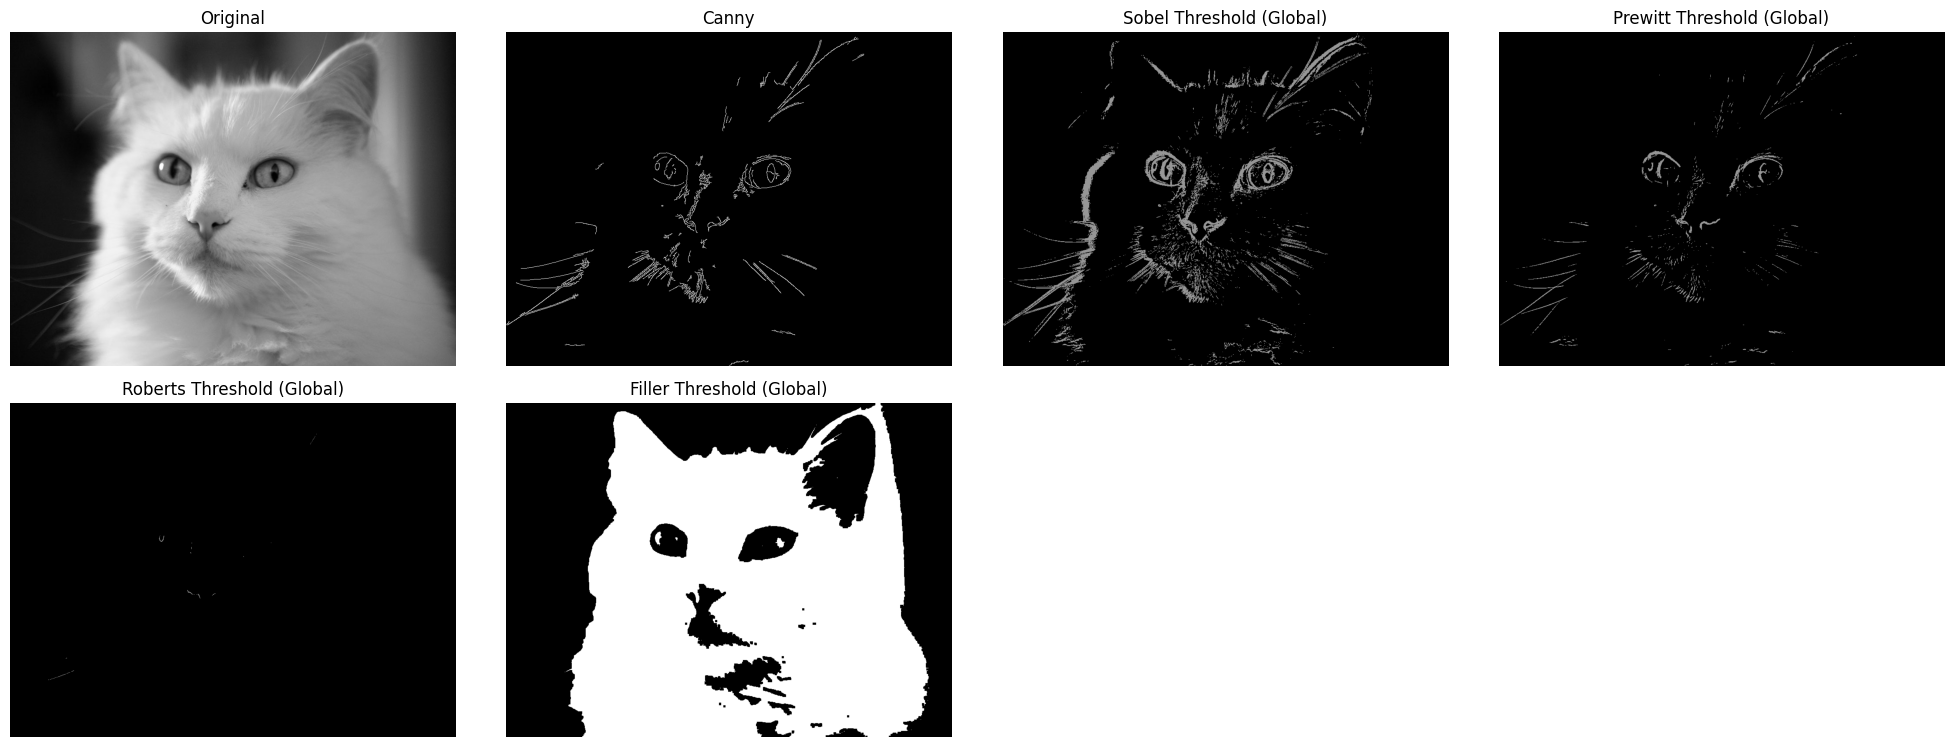

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# ---------- SOBEL ----------
sobel_ksize = 3
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=sobel_ksize)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=sobel_ksize)
sobel = cv2.magnitude(sobelx, sobely)
sobel = cv2.convertScaleAbs(sobel)

# Sobel Thresholding
_, sobel_global = cv2.threshold(sobel, 50, 150, cv2.THRESH_BINARY)
#_, sobel_otsu = cv2.threshold(sobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# ---------- PREWITT ----------
prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewittx = cv2.filter2D(image, -1, prewitt_kernel_x)
prewitty = cv2.filter2D(image, -1, prewitt_kernel_y)
prewitt = cv2.magnitude(prewittx.astype(np.float32), prewitty.astype(np.float32))
prewitt = cv2.convertScaleAbs(prewitt)

# Prewitt Thresholding
_, prewitt_global = cv2.threshold(prewitt, 50, 150, cv2.THRESH_BINARY)
#_, prewitt_otsu = cv2.threshold(prewitt, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# ---------- ROBERTS ----------
roberts_kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
roberts_kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
robertsx = cv2.filter2D(image, -1, roberts_kernel_x)
robertsy = cv2.filter2D(image, -1, roberts_kernel_y)
roberts = cv2.magnitude(robertsx.astype(np.float32), robertsy.astype(np.float32))
roberts = cv2.convertScaleAbs(roberts)

# Roberts Thresholding
_, roberts_global = cv2.threshold(roberts, 50, 150, cv2.THRESH_BINARY)
#_, roberts_otsu = cv2.threshold(roberts, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# ---------- FILLER (MORPHOLOGY) ----------
morph_kernel = np.ones((5, 5), np.uint8)
filler = cv2.morphologyEx(image, cv2.MORPH_CLOSE, morph_kernel)

# Filler Thresholding
_, filler_global = cv2.threshold(filler, 127, 255, cv2.THRESH_BINARY)
#_, filler_otsu = cv2.threshold(filler, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# ---------- CANNY ----------
def auto_canny(img, sigma=0.5):
    med = np.median(img)
    lower = int(max(0, (1.0 - sigma) * med))
    upper = int(min(255, (1.0 + sigma) * med))
    return cv2.Canny(img, 50, 150)

canny = auto_canny(image)


# ---------- DISPLAY ----------
titles = [
    'Original', 'Canny',
    'Sobel Threshold (Global)',
    'Prewitt Threshold (Global)', 
    'Roberts Threshold (Global)', 
    'Filler Threshold (Global)',
]
images = [
    image, canny,
    sobel_global, prewitt_global,
    roberts_global, filler_global,
]

plt.figure(figsize=(20, 15))
for i in range(len(images)):
    plt.subplot(4, 4, i + 1)
    cmap = 'gray' if len(images[i].shape) == 2 else None
    plt.imshow(images[i], cmap=cmap)
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
